In [1]:
import model
import torch
import torch.nn as nn
import data_loader
import matplotlib.pyplot as plt

In [4]:
ds = data_loader.ObjectSegmentationDataset(r"C:\Users\user\Documents\dane\100Objects_train", r"C:\Users\user\Documents\dane\100Objects_train\annotations.json", load_memory=False)

net = model.Segmentator()
net.load_state_dict(torch.load("./model.pth", map_location=torch.device("cpu")))
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

C:\Users\user\miniconda3\envs\torchenv\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

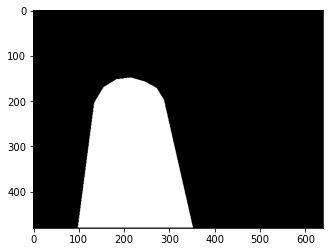

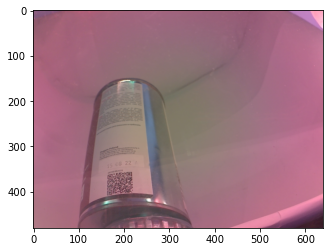

In [3]:
im, mask = ds[0]
plt.imshow(mask, cmap="gray")
plt.show()
plt.imshow(im.permute((1,2,0)))
plt.show()

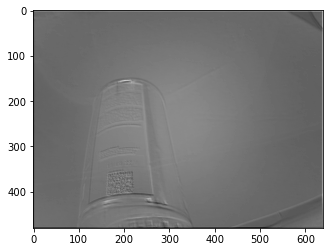

In [4]:
estimated = net(im.unsqueeze(0))
estimated = estimated.squeeze(0)
plt.imshow(estimated.detach().numpy(), cmap="gray")
plt.show()